<img src="img/nasa_open_data.png">

<hr>
<h1 align=center> Analisys of NASA's Dataset on Meteorite Landings </h1><br>
<div align=left> <a href="https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh">NASA's Open Data Portal - Meteorite Landings</a> </div>
<br>
<b> Data Analisys Fundamentals - Course's Project </b>
<br>
<i> Salvatore Campisi, W82000209 </i>
<br>
<i> AY 2018/2019 </i>

<hr>
<b>1. Overview:</b><br>
<a href="https://en.wikipedia.org/wiki/Meteorite">Meteorites</a> are bits of interplanetary material falling through Earth's atmosphere and heated to incandescence by friction.<br>
Most meteorites (but not all) burns up in the atmosphere before even reaching the ground, but some meteorite's dust is captured by high-altitude aircraft and analyzed in NASA's laboratories.

<b>2. Dataset Information: </b>
<br>
This dataset is mantained by <a href="https://www.nasa.gov">NASA</a> in collaboration with <a href="https://meteoritical.org">The Meteoritical Society</a> and contains data on all of the known 45 716 meteorites that have struck our planet.<br>


This dataset contains the following variables:

<table align=left>
    <tr>
        <td><font size=3><b>name </b></font> :<td> 
        <td><font size=2><p>the name that NASA and Meteoritical Society assigned to the meteorite.</p></font></td>
    </tr> 
    <tr>
        <td><font size=3><b>id</b></font> :<td> 
        <td><font size=2><p>a unique identifier for the meteorite.</p></font></td>
    </tr> 
    <tr>
        <td><font size=3><b>nametype</b></font> :<td> 
        <td><font size=2><p> variable which describes the
            degradation of the meteorite caused by weather on Earth.<br><br>
            <i>-- Valid :</i> a meteorite not highly degraded.<br>
            <i>-- Relict :</i> a meteorite too much degraded.
            </p></font></td>
    </tr>
    <tr>
        <td><font size=3><b>recclass</b></font> :<td> 
        <td><font size=2><p>the class of the meteorite,
            based on physical, chemical, and other meteorite's characteristics.</p></font></td>
    </tr> 
    <tr>
        <td><font size=3><b>mass</b></font> :<td> 
        <td><font size=2><p>the mass of the meteorite in grams.</p></font></td>
    </tr> 
    <tr>
        <td><font size=3><b>fall</b></font> :<td> 
        <td><font size=2><p>variable which describes if the meteorite was seen falling,
            or was discovered after its impact.<br><br>
            <i>-- Fell :</i> the meteorite's fall was observed.<br>
            <i>-- Found :</i> the meteorite's fall was not observed.
            </p></font></td>
    </tr>
    <tr>
        <td><font size=3><b>year</b></font> :<td> 
        <td><font size=2><p>the year the meteorite fell or was found
            (depending on the value of fall).</p></font></td>
    </tr> 
    <tr>
        <td><font size=3><b>reclat</b></font> :<td> 
        <td><font size=2><p>the latitude of the meteorite's landing.</p></font></td>
    </tr> 
    <tr>
        <td><font size=3><b>reclon</b></font> :<td> 
        <td><font size=2><p>the longitude of the meteorite's landing.</p></font></td>
    </tr> 
    <tr>
        <td><font size=3><b>GeoLocation</b></font> :<td> 
        <td><font size=2><p>comma-separated tuple (parentheses-enclose) which combines reclat and reclong.</p></font></td>
    </tr> 
</table>

<b><i> Note that a few column names start with "rec". These are the recommended values of these variables, according to NASA and The Meteoritical Society. </i></b>

<b> 3. Analysis Goals: </b><br>
<ul>
<li>
Use the values of latitude and longitude for each meteorite to estimate the differences between the two following geographical distributions:<br>
- Meteorites whose fall has been observed,<br>
- Meteorites found after the impact with Earth.<br>
<br>
This analysis could answer concretely to the following questions:<br>
• Which is the geographic area where it's more likely to see a meteorite falling?<br>
• Where would it be more strategic to build observation bases for meteorite research in the near future?<br>
• Which are the geographic areas where it's more likely to find a meteorite not yet discovered? Where is more convenient to look for?<br>
</li>
<br>
<li>
Use the data in order to answer the following questions:<br> 
• There is a correlation between a certain geographic area and the class of the meteorites found in that area?<br>
• There is a correlation between a certain time window and the class of the meteorites observed falling?<br>
• In general, are there significant correlations between variables?<br>
&nbsp;&nbsp;Is it possible obtain helpful informations to refine the answers to the questions asked in the previous points?
</li>
</ul>
<hr>

In [1]:
import numpy  as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from cartopy import crs as ccrs
from cartopy import feature as cfeature
from scipy.stats import zscore

# For not showing Warnings in the Notebook:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading CSV Dataset in a Pandas Dataframe:
#(CSV Dataset is located on personal server to avoid too many access to NASA's portal).  

nasa_dataset_url = "http://salvocampisi.com/datasets/nasa_meteorite_landings.csv"
nasa_df = pd.read_csv(nasa_dataset_url)

In [3]:
# Dataframe Info:
nasa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
name           45716 non-null object
id             45716 non-null int64
nametype       45716 non-null object
recclass       45716 non-null object
mass           45585 non-null float64
fall           45716 non-null object
year           45428 non-null float64
reclat         38401 non-null float64
reclong        38401 non-null float64
GeoLocation    38401 non-null object
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [4]:
# Dataframe first 5 rows:
nasa_df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [5]:
# Dataframe Manipulation:

# Removing the rows that have NaN values in any columns: 
nasa_df.dropna(inplace=True)

# Removing the columns "GeoLocation" because it is redundant:
nasa_df = nasa_df.drop(columns=["GeoLocation"])

# Removing the rows that have Not Valid "latitude" and "longitude" values:
nasa_df = nasa_df[(nasa_df["reclat"] != 0.0) & (nasa_df["reclong"] != 0.0)]

In [6]:
# Manipulated Dataset Examples:
nasa_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31706 entries, 0 to 45715
Data columns (total 9 columns):
name        31706 non-null object
id          31706 non-null int64
nametype    31706 non-null object
recclass    31706 non-null object
mass        31706 non-null float64
fall        31706 non-null object
year        31706 non-null float64
reclat      31706 non-null float64
reclong     31706 non-null float64
dtypes: float64(4), int64(1), object(4)
memory usage: 2.4+ MB


In [7]:
# Creating views for better analysis:
nasa_df  = nasa_df[(nasa_df["nametype"] == "Valid")]   # Meteorites in good conditions for being studied
nasa_df_fell   = nasa_df[(nasa_df["fall"] == "Fell")]  # Meteorites observed falling
nasa_df_found  = nasa_df[(nasa_df["fall"] == "Found")] # Meteorites found after their fall

In [8]:
# Geographical Analysis:

# Creating coordinates boxes for the geographical map:
# box_AREA = [West, East, North, South]

# Earth:
box_globe = [-180, 180, 90, -90]

# Continents:
box_america   = [-175, -27,  75, -25]
box_africa    = [ -25,  60,  30, -28]
box_europe    = [ -27,  60,  65, 30 ]
box_asia      = [  35, 150,  80, 1  ]
box_oceania   = [  85, 180,  20, -50]
box_antartica = [-180, 180, -25, -90]

# America's specific areas:
box_north_america = [-170, -40,  75, 5  ]
box_south_america = [-108, -28,  15, -50]
box_usa = [-130, -60, 45, 25]

# Asia's specific areas:
box_arabia = [31, 60, 37, 12]
box_oman   = [51, 61, 24, 16]

# Antartica's specific areas:
box_zucchelli = [135, 179, -65, -89]

In [9]:
# Geographical Analysis:

# Creating a function that allows to plot (longitude, latitude) points on a geographical map:

# Function Parameters:
# _title = geographical map title
# _description = geographical map description
# _marker = markers type
# _color = markers color
# _alpha = markers alpha
# _globe_area = globe area box coordinates to zoom in
# _series_long = longitude of points to plot
# _series_lat = latitude of points to plot

def show_geo_points(_title, _description, _marker, _color, _alpha, _globe_area, _series_long, _series_lat):
    # Graphic parameters:
    local_title = _title
    local_title_size = 16
    local_width = 20
    local_height = 20
    local_points_color = _color
    local_points_alpha = _alpha
    local_marker = _marker
    local_description = _description
    local_graphic_coordinates = _globe_area
        
    # Setting up the coordinates:
    west_long = local_graphic_coordinates[0]
    east_long = local_graphic_coordinates[1]
    north_lat = local_graphic_coordinates[2]
    south_lat = local_graphic_coordinates[3]
    
    # Setting up the graphic:
    plt.figure(figsize=(local_width, local_height))
    
    geo_axes = plt.axes(projection=ccrs.PlateCarree())
    
    geo_axes.set_extent([west_long, east_long, north_lat, south_lat])
    
    geo_axes.add_feature(cfeature.COASTLINE, edgecolor="#7e7e7e")
    geo_axes.add_feature(cfeature.LAND)
    geo_axes.add_feature(cfeature.BORDERS, edgecolor="#d7d7d7")
    geo_axes.add_feature(cfeature.OCEAN)
    geo_axes.add_feature(cfeature.LAKES)
    geo_axes.add_feature(cfeature.RIVERS)
    
    # Plotting the data:
    plt.scatter(_series_long, _series_lat, marker=local_marker, c=local_points_color, alpha=local_points_alpha)
    plt.title(local_title, fontsize=local_title_size)
    plt.show()
    if local_description != "":
        print("• Description: ", local_description)
        
# Example:
# show_geo_points("", "ciao", "x", "#FF1493", 0.10, box_zucchelli, nasa_df_found["reclong"], nasa_df_found["reclat"])

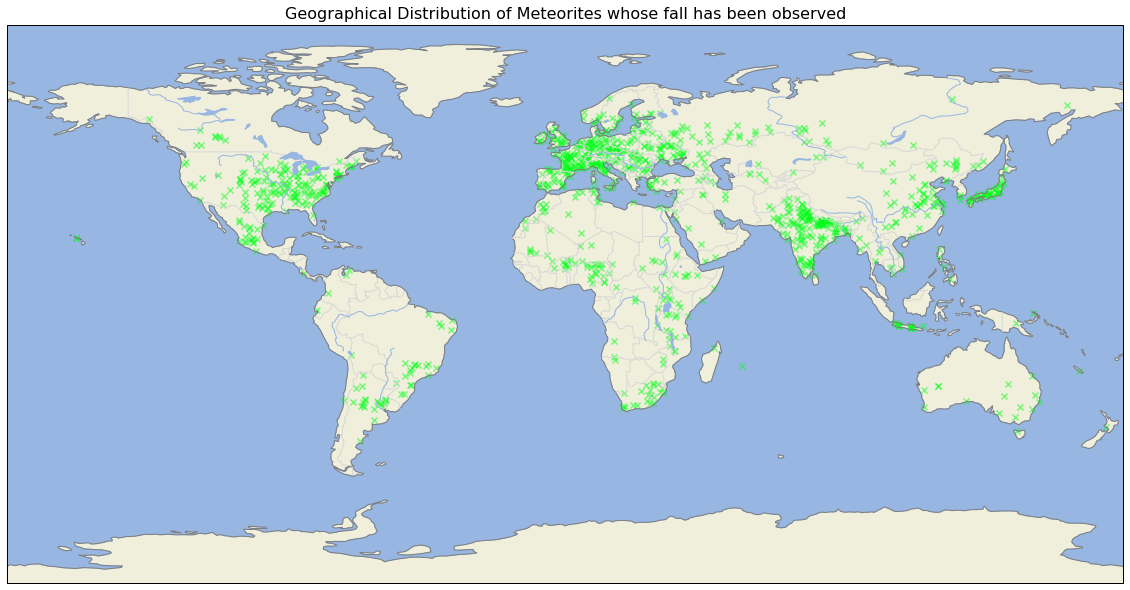

• Description:  Meteorites seen falling around all the globe.


In [10]:
# Geographical Analysis: Geographical Distribution of Meteorites whose fall has been observed.

title = "Geographical Distribution of Meteorites whose fall has been observed"
description = "Meteorites seen falling around all the globe."

show_geo_points(title, description, "x", "#00FF17", 0.50, box_globe, nasa_df_fell["reclong"], nasa_df_fell["reclat"])

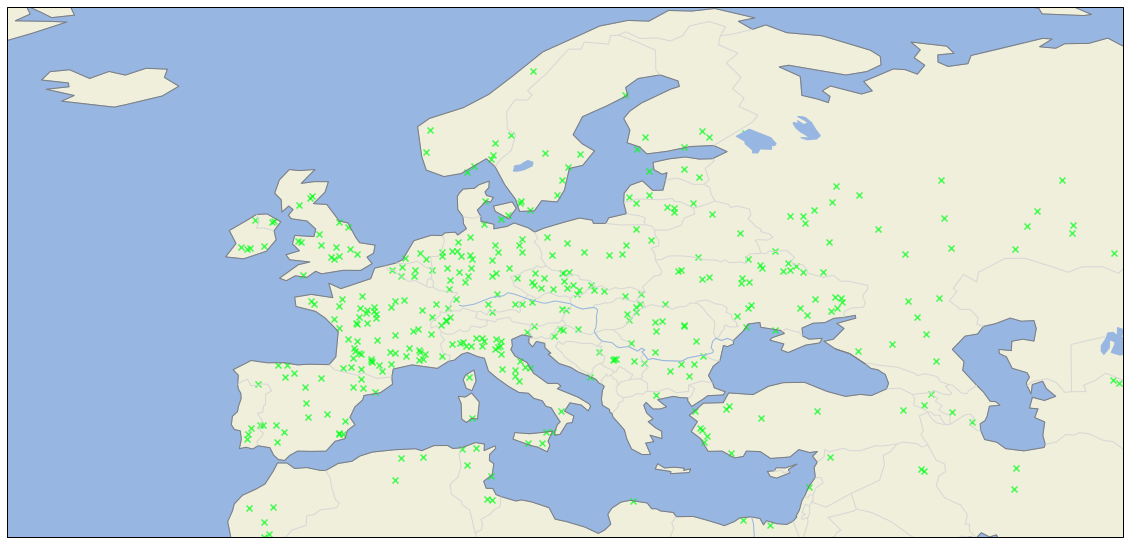

• Description:  Meteorites seen falling in Europe.


In [11]:
description = "Meteorites seen falling in Europe."

show_geo_points("", description, "x", "#00FF17", 0.70, box_europe, nasa_df_fell["reclong"], nasa_df_fell["reclat"])

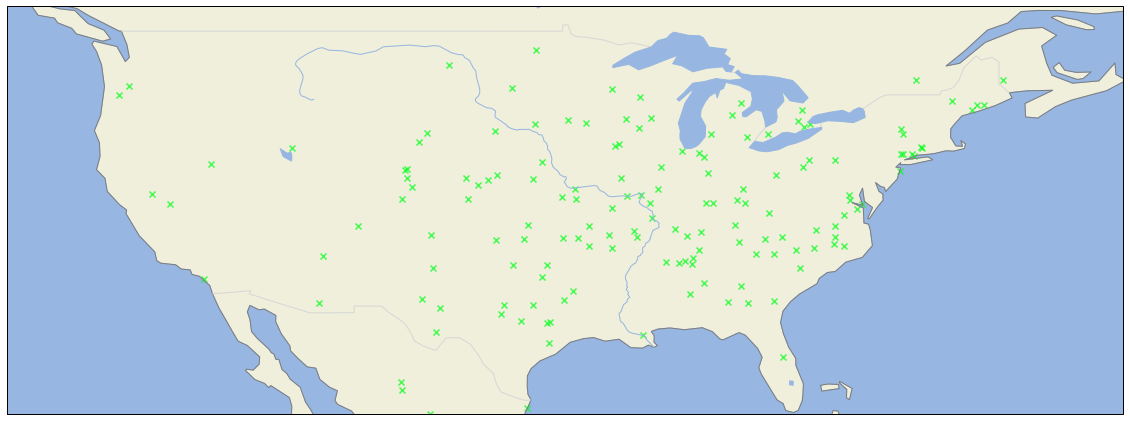

• Description:  Meteorites seen falling in USA.


In [12]:
description = "Meteorites seen falling in USA."

show_geo_points("", description, "x", "#00FF17", 0.70, box_usa, nasa_df_fell["reclong"], nasa_df_fell["reclat"])

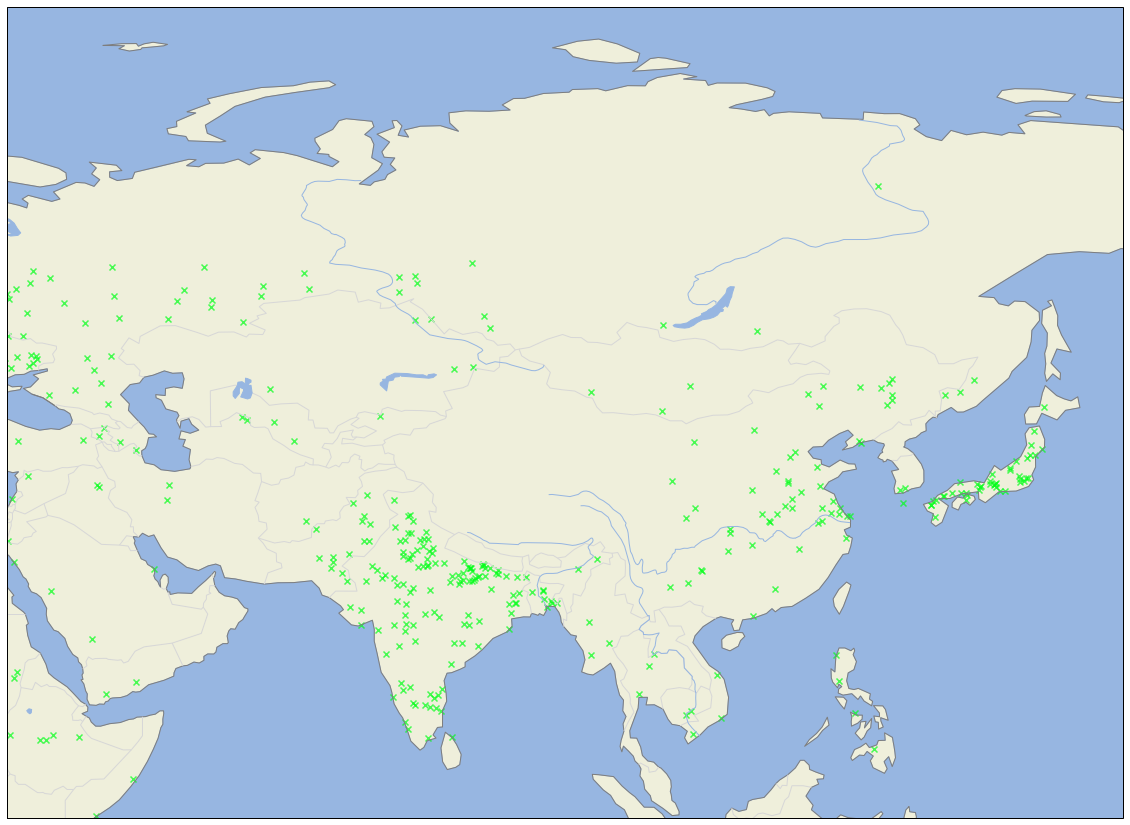

• Description:  Meteorites seen falling in Asia.


In [13]:
description = "Meteorites seen falling in Asia."

show_geo_points("", description, "x", "#00FF17", 0.70, box_asia, nasa_df_fell["reclong"], nasa_df_fell["reclat"])

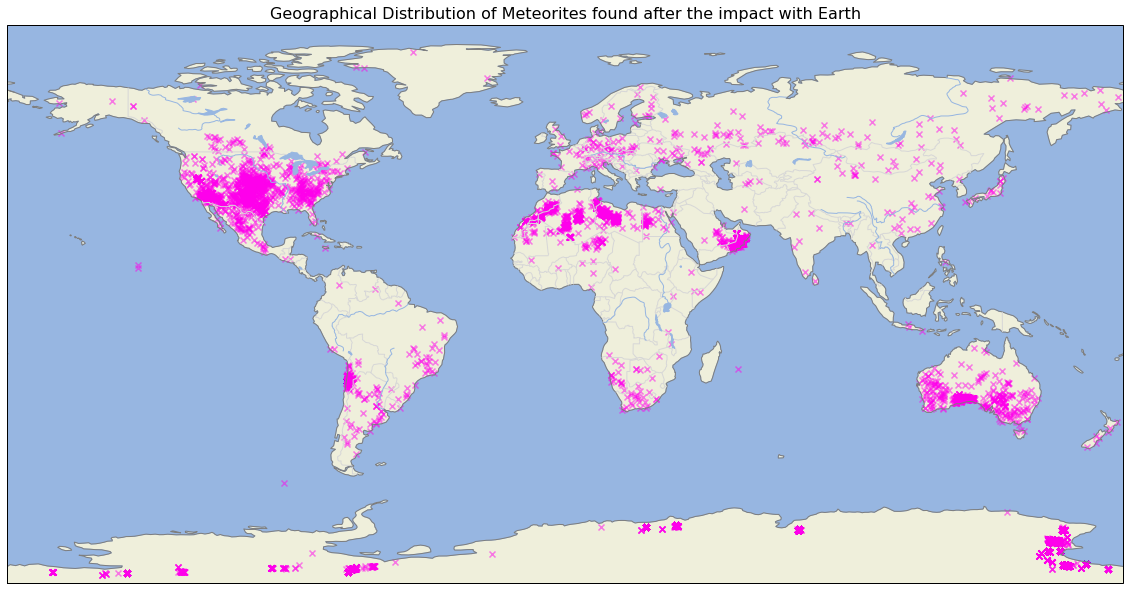

• Description:  Meteorites found around all the globe.


In [14]:
# Geographical Analysis: Geographical Distribution of Meteorites found after the impact with Earth.

title = "Geographical Distribution of Meteorites found after the impact with Earth"
description = "Meteorites found around all the globe."

show_geo_points(title, description, "x", "#FF00EC", 0.50, box_globe, nasa_df_found["reclong"], nasa_df_found["reclat"])

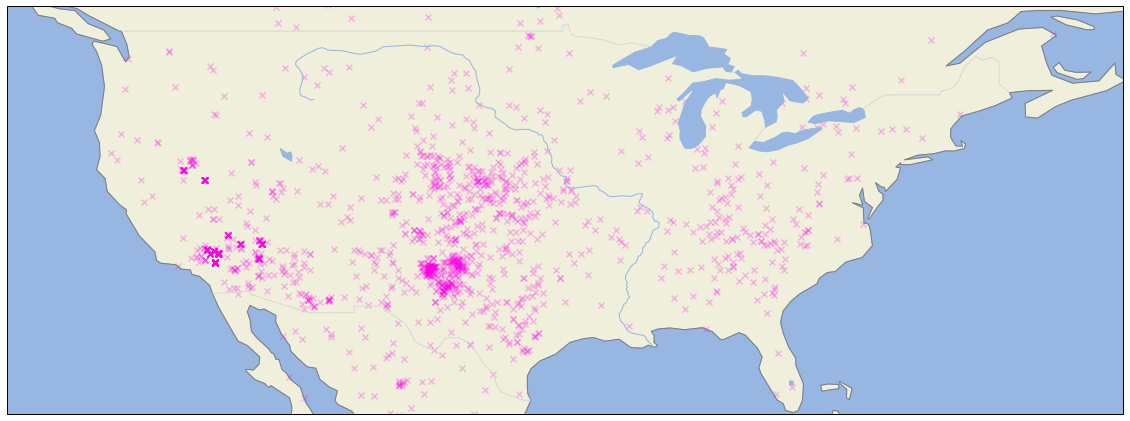

• Description:  Meteorites found ins USA.


In [15]:
description = "Meteorites found ins USA."

show_geo_points("", description, "x", "#FF00EC", 0.25, box_usa, nasa_df_found["reclong"], nasa_df_found["reclat"])

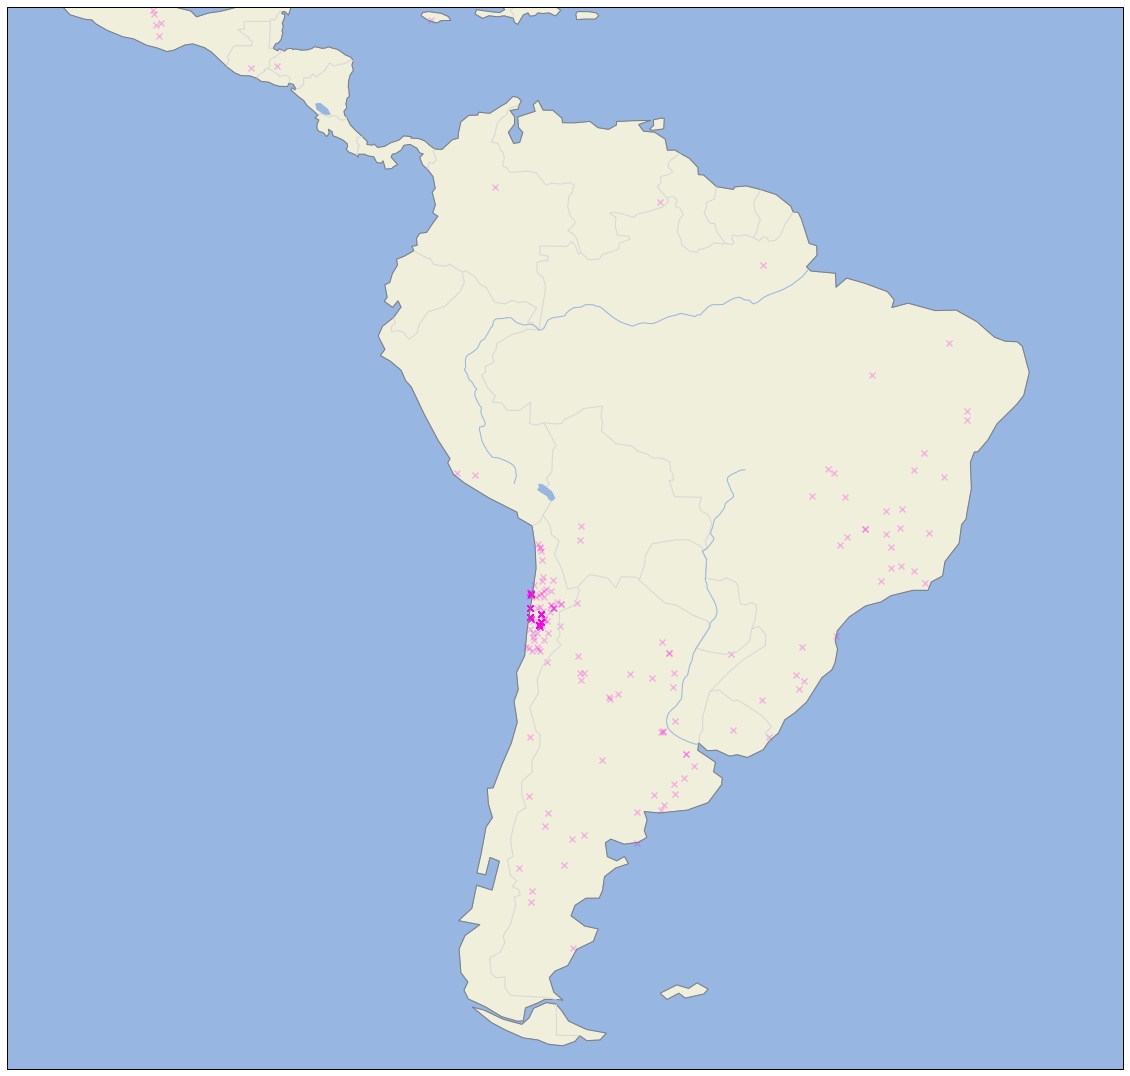

• Description:  Meteorites found in South America.


In [16]:
description = "Meteorites found in South America."

show_geo_points("", description, "x", "#FF00EC", 0.25, box_south_america, nasa_df_found["reclong"], nasa_df_found["reclat"])

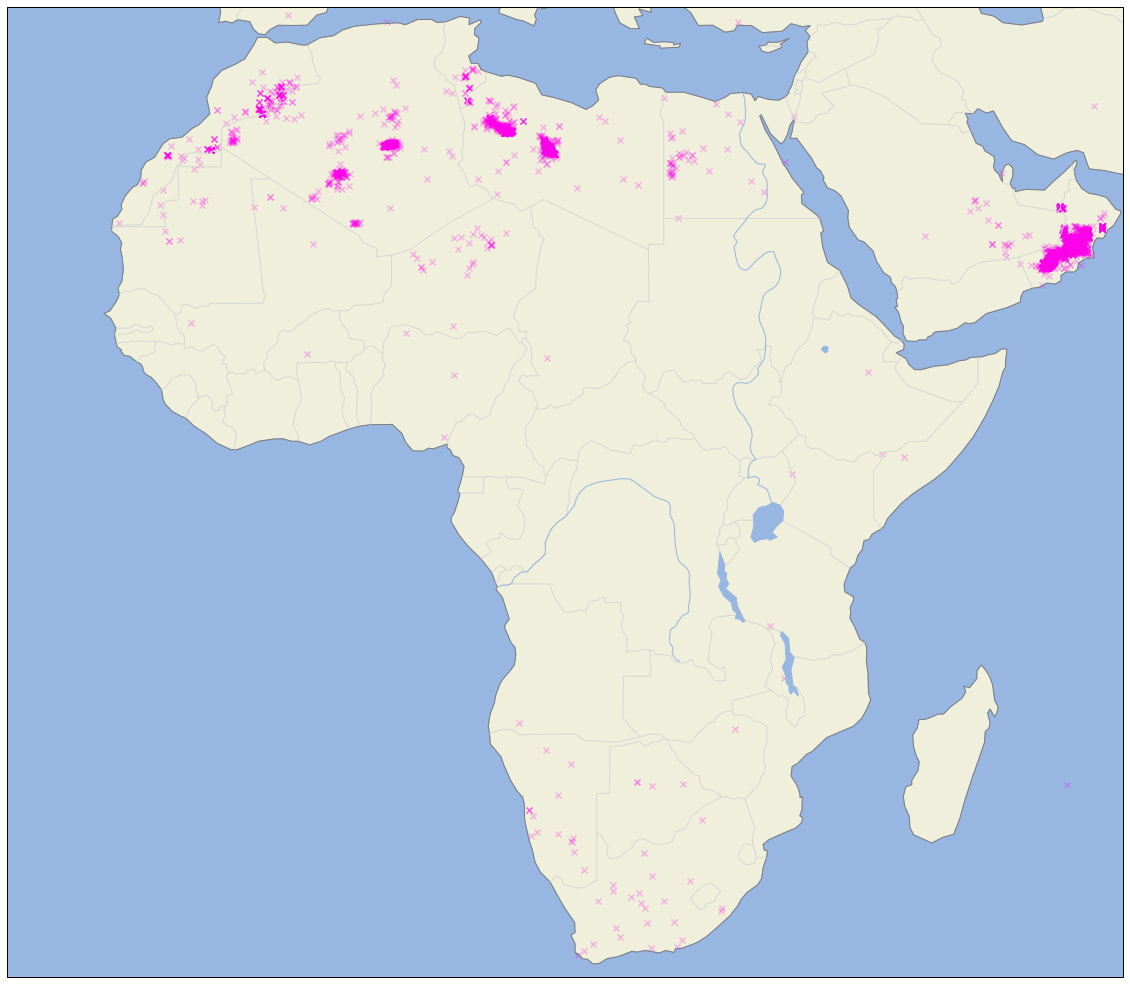

• Description:  Meteorites found in Africa.


In [17]:
description = "Meteorites found in Africa."

show_geo_points("", description, "x", "#FF00EC", 0.25, box_africa, nasa_df_found["reclong"], nasa_df_found["reclat"])

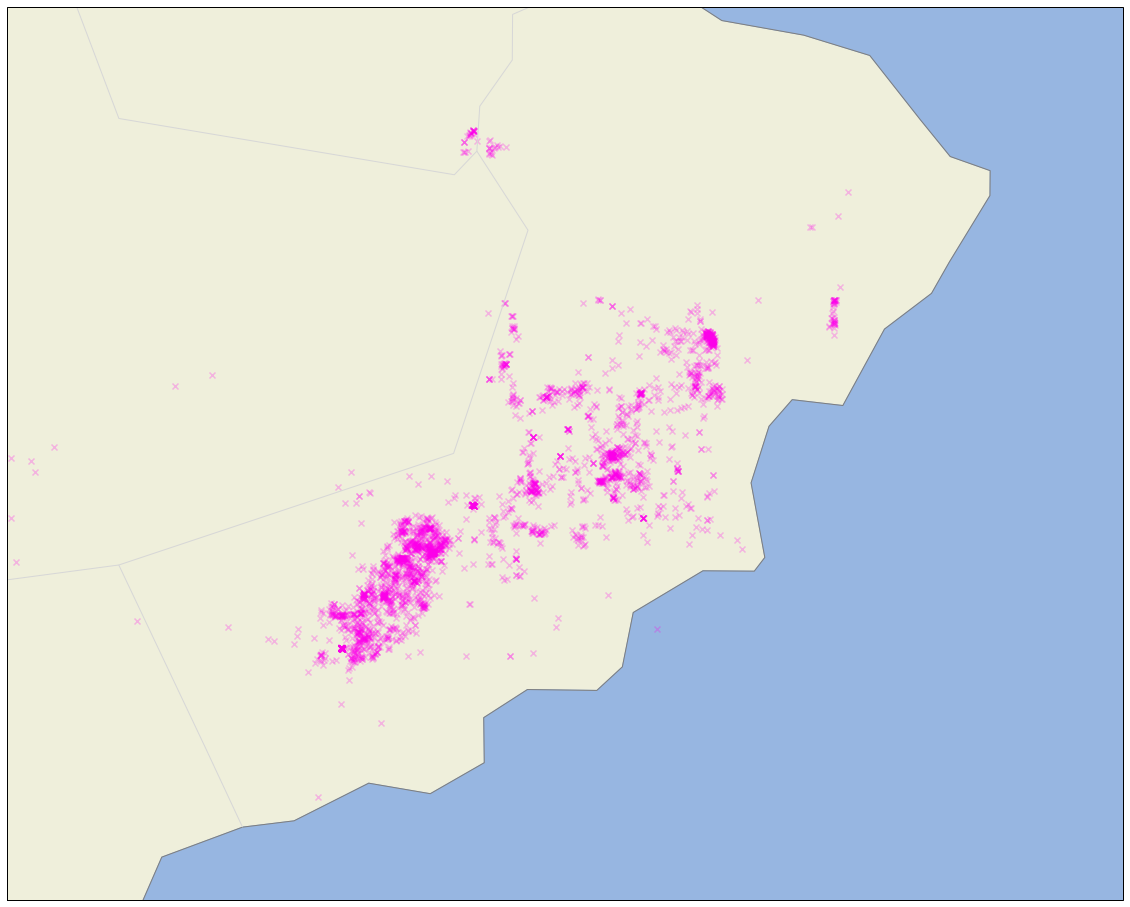

• Description:  Meteorites found in Oman (a country on the Arabian Peninsula).


In [18]:
description = "Meteorites found in Oman (a country on the Arabian Peninsula)."

show_geo_points("", description, "x", "#FF00EC", 0.25, box_oman, nasa_df_found["reclong"], nasa_df_found["reclat"])

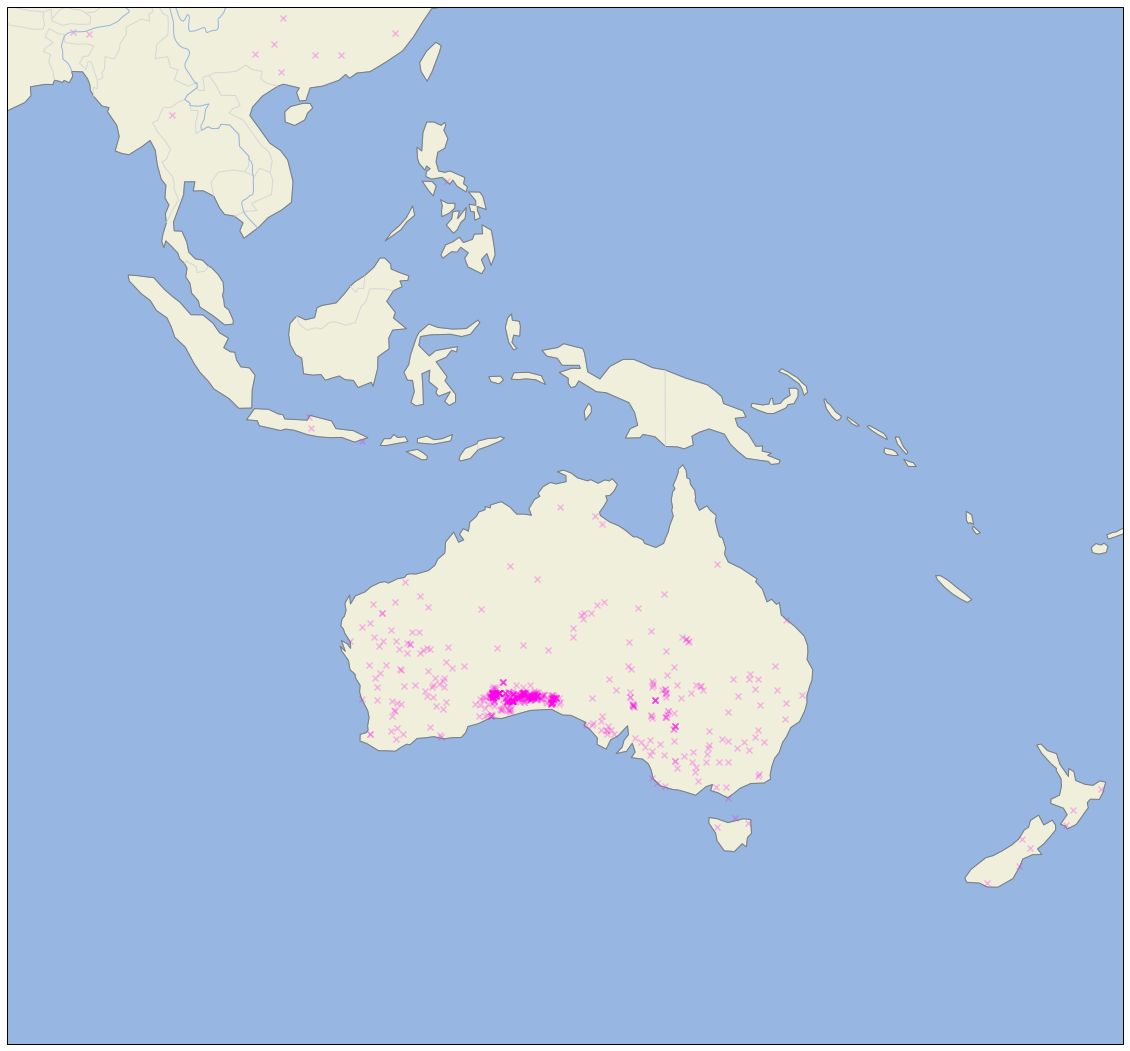

• Description:  Meteorites found in Oceania.


In [19]:
description = "Meteorites found in Oceania."

show_geo_points("", description, "x", "#FF00EC", 0.25, box_oceania, nasa_df_found["reclong"], nasa_df_found["reclat"])

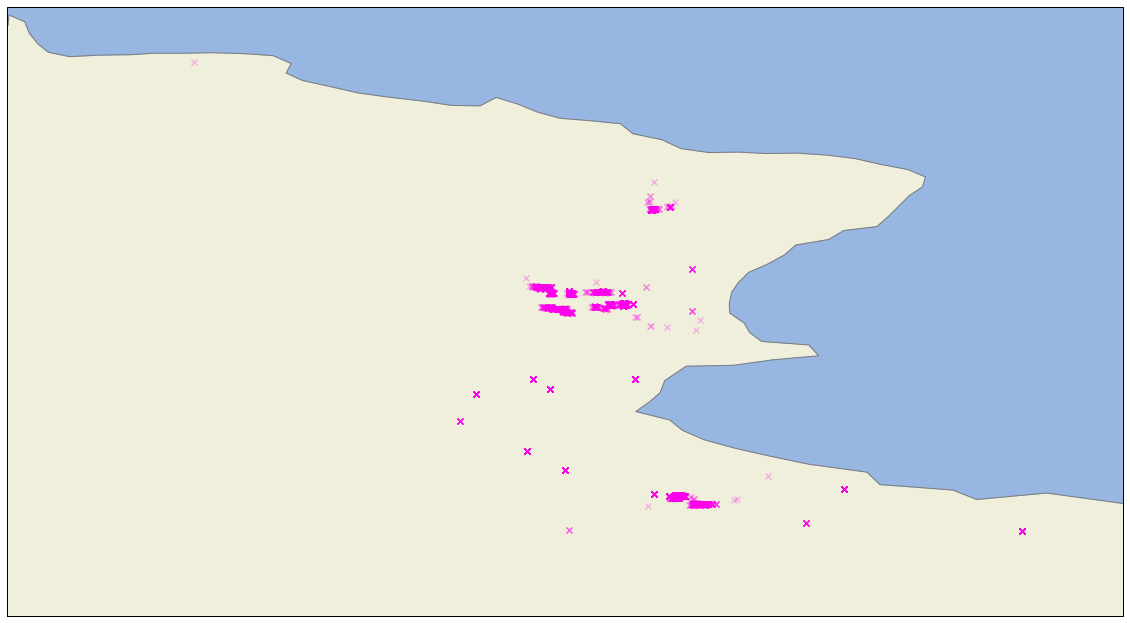

• Description:  Meteorites found near Zucchelli (an Italian scientific basis in Antartica).


In [20]:
description = "Meteorites found near Zucchelli (an Italian scientific basis in Antartica)."

show_geo_points("", description, "x", "#FF00EC", 0.25, box_zucchelli, nasa_df_found["reclong"], nasa_df_found["reclat"])